# Distinguishing Sentiments  

## Sentiment Analysis of Media Tweets (01/07/2018)
   1. Visualized summary of the sentiments expressed in Tweets sent out by the following 
      news organizations: BBC, CBS, CNN, Fox, and New York times.
   2. Ranging from -1.0 to 1.0, 
      where a score of 0 expresses a neutral sentiment, 
      -1 the most negative sentiment possible, and 
      +1 the most positive sentiment possible.
      Each plot point is reflected the compound sentiment of a tweet.
   3. Tweet Polarity is split evenly between -1.0 to 1.0 range.
   4. Tweets Ago starting from current 0 to past 100 tweets range
      ( I am achieving 100 tweets goal by starting with current tweet and searching 
        through 2 pages of tweets. 2 * 100 = 200 tweets. With "counter" variable , I break once I reach 100 tweets.
        Because when I was searching through only 1 page, I was always getting less than 100 tweets)

## Overall Media Sentiment based on Twitter (01/10/2018)
    1. Most positive compound sentiments is CNN with 0.05  
    2. Almost~ Neutral is BBC & New York Times media news sentiments with -0.01 & 0.01
    2. Most negative is CBS media news sentiments with -0.1


In [23]:
# Dependencies
import tweepy
import numpy as np
import json
import time
import random
import requests as req
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv as csl
plt.style.use('ggplot')
from dateutil import parser
import datetime

In [6]:
import yaml
TWITTER_CONFIG_FILE = 'auth.yaml'

with open(TWITTER_CONFIG_FILE, 'r') as config_file:
    config = yaml.load(config_file)
    
print(type(config))

<class 'dict'>


In [7]:
import json

#print(json.dumps(config, indent=4, sort_keys=True))

In [ ]:
consumer_key = config['twitter']["consumer_key"]
print(consumer_key)  

In [9]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

 

In [36]:
 
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

 

In [11]:
# Target Search Term
target_terms = ("@BBC", "@CNN", "@CBSNews",
                "@FoxNews", "@nytimes" )

 

In [12]:
lang = "en"

# Array to hold sentiments for each tweet
each_sentiments = []

# Array to hold sentiments for each avergage source/target
avg_sentiments = []

 

# Variable for holding the oldest tweet
oldest_tweet = ""

 

In [13]:
# Loop through all target news organizations
for target in target_terms:
    
    #Counter
    counter = 1

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    
    # Loop through each page (total of 100 tweets, 1 page = 100 )
    #for x in range(2): # loop through 2 page. max of each page is 100 tweets 100 * 2 = 200 tweets
    
    for x in range(2): # loop through 2 page. max of each page is 100 tweets
        
        # Run search around each tweet and pull 100 tweets
        public_tweets = api.search(
            target, count=100, result_type="recent", max_id=oldest_tweet)
        #print("counter %d: " % (counter))

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user tweet lang is english        
            if tweet["user"]["lang"] == lang:
                if counter == 1:
                    print(
                    json.dumps(
                    tweet,
                    sort_keys=True,
                    indent=4,
                    separators=(',' , ': ')))
                    #Print first tweet text
                    print("\n")
                    print("Source %s: " % (target))
                    print("\n")
                    print("Tweet %s: %s" % (counter, tweet["text"]))


                # Run Vader Analysis on each tweet along with getting info of the tweet created and twitter text
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]

                # Add each value to the appropriate array
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)


                # Add sentiments for each tweet into an array
                each_sentiments.append({"Source": target,
                                   "text": tweet["text"],
                                   "Date": tweet["created_at"], 
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Negative": neg,
                                   "Neutral": neu,
                                   "Tweets_Ago": counter})

                # Add to counter 
                counter = counter + 1 
                if counter == 101: # once the tweets reach 100, then we break the loop
                    break 
                    print("Achieved goal of counter %d: " % (counter))


    # Store the Average Sentiments         
    def color_schema(x):
        col = ""
        if x=="@BBC":
            col = "skyblue"       
        elif x=="@CBSNews":
            col = "green" 
        elif x=="@CNN": 
            col = "red"
        elif x=="@FoxNews":
            col = "blue"
        elif x == "@nytimes":
            col = "yellow"
        return col

    # Store the Average Sentiments      
    avg_sentiments.append({
        "User": target, 
        "color": color_schema(target),
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Neutral": np.mean(negative_list),
        "Negative": np.mean(neutral_list),
        "Tweet_Count": len(compound_list)
        })
    # Print the Sentiments
    print(avg_sentiments)
    print("")


    

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Wed Jan 10 16:10:43 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/bbcnews/status\u2026",
                "expanded_url": "https://twitter.com/bbcnews/status/950764582284521474",
                "indices": [
                    105,
                    128
                ],
                "url": "https://t.co/vPulAVwLCo"
            }
        ],
        "user_mentions": [
            {
                "id": 14590758,
                "id_str": "14590758",
                "indices": [
                    3,
                    16
                ],
                "name": "Anna McMorrin MP",
                "screen_name": "AnnaMcMorrin"
            },
            {
                "id": 19701628,
                "id_str": "19701628",
                "indices": [
                    19,
                    23
 

[{'User': '@BBC', 'color': 'skyblue', 'Compound': 0.013868000000000009, 'Positive': 0.065240000000000006, 'Neutral': 0.060299999999999992, 'Negative': 0.87447000000000008, 'Tweet_Count': 100}]

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Wed Jan 10 16:10:57 +0000 2018",
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/igf0mQgm1d",
                "expanded_url": "https://twitter.com/ChanBahlumII/status/951124212219031552/photo/1",
                "id": 951124207500324864,
                "id_str": "951124207500324864",
                "indices": [
                    6,
                    29
                ],
                "media_url": "http://pbs.twimg.com/media/DTMSbW1U8AAb2R1.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DTMSbW1U8AAb2R1.jpg",
                "sizes": {
                    "large": {
                        "h": 439,
                      

[{'User': '@BBC', 'color': 'skyblue', 'Compound': 0.013868000000000009, 'Positive': 0.065240000000000006, 'Neutral': 0.060299999999999992, 'Negative': 0.87447000000000008, 'Tweet_Count': 100}, {'User': '@CNN', 'color': 'red', 'Compound': -0.12869100000000003, 'Positive': 0.05414999999999999, 'Neutral': 0.089849999999999999, 'Negative': 0.85596000000000005, 'Tweet_Count': 100}, {'User': '@CBSNews', 'color': 'green', 'Compound': 0.054511999999999998, 'Positive': 0.073690000000000005, 'Neutral': 0.054870000000000002, 'Negative': 0.87143999999999988, 'Tweet_Count': 100}]

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Wed Jan 10 16:10:59 +0000 2018",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/9\u2026",
                "expanded_url": "https://twitter.com/i/web/status/951124220511219712",
                "indices": [
                    120,
               

[{'User': '@BBC', 'color': 'skyblue', 'Compound': 0.013868000000000009, 'Positive': 0.065240000000000006, 'Neutral': 0.060299999999999992, 'Negative': 0.87447000000000008, 'Tweet_Count': 100}, {'User': '@CNN', 'color': 'red', 'Compound': -0.12869100000000003, 'Positive': 0.05414999999999999, 'Neutral': 0.089849999999999999, 'Negative': 0.85596000000000005, 'Tweet_Count': 100}, {'User': '@CBSNews', 'color': 'green', 'Compound': 0.054511999999999998, 'Positive': 0.073690000000000005, 'Neutral': 0.054870000000000002, 'Negative': 0.87143999999999988, 'Tweet_Count': 100}, {'User': '@FoxNews', 'color': 'blue', 'Compound': -0.00044099999999998698, 'Positive': 0.084859999999999991, 'Neutral': 0.071340000000000001, 'Negative': 0.84377000000000013, 'Tweet_Count': 100}, {'User': '@nytimes', 'color': 'yellow', 'Compound': 0.046898999999999996, 'Positive': 0.076319999999999999, 'Neutral': 0.060659999999999999, 'Negative': 0.86302000000000012, 'Tweet_Count': 100}]



In [14]:
# Print the Sentiments
#print(each_sentiments)
#print("")

In [15]:
# Convert each sentiments to DataFrame
each_sentiments_pd = pd.DataFrame.from_dict(each_sentiments)
each_sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Source,Tweets_Ago,text
0,-0.7397,Wed Jan 10 16:10:43 +0000 2018,0.294,0.706,0.000,@BBC,1,RT @AnnaMcMorrin: .@BBC @BBCRadio4 this is a v...
1,-0.2960,Wed Jan 10 16:10:42 +0000 2018,0.099,0.901,0.000,@BBC,2,The @BBC program #HouseofSaud is not balanced....
2,0.0000,Wed Jan 10 16:10:36 +0000 2018,0.000,1.000,0.000,@BBC,3,RT @BBC: 🚀✨ David Bowie changed music forever....
3,0.0000,Wed Jan 10 16:10:17 +0000 2018,0.000,1.000,0.000,@BBC,4,#CES 2018: @Kodak's plans for the #KodakCoin a...
4,0.7750,Wed Jan 10 16:10:09 +0000 2018,0.040,0.730,0.231,@BBC,5,RT @TomLondon6: Of course @BBC must deal urgen...


In [16]:
# Saving all my extracted data to the csv file 
each_sentiments_pd.to_csv('./extracted_tweets_each_sentiments_pd.csv')

In [17]:
#Convert each source average sentiments to DataFrame
avg_sentiments_pd = pd.DataFrame.from_dict(avg_sentiments)
avg_sentiments_pd


,Compound,Negative,Neutral,Positive,Tweet_Count,User,color
0,0.013868,0.87447,0.06030,0.06524,100,@BBC,skyblue
1,-0.128691,0.85596,0.08985,0.05415,100,@CNN,red
2,0.054512,0.87144,0.05487,0.07369,100,@CBSNews,green
3,-0.000441,0.84377,0.07134,0.08486,100,@FoxNews,blue
4,0.046899,0.86302,0.06066,0.07632,100,@nytimes,yellow


In [18]:
# Saving all my extracted data to the csv file 
avg_sentiments_pd.to_csv('./extracted_average_source_sentiments_pd.csv')

In [19]:
# obtain the x and y coordinates for each 100 tweets of the 5 Media Sources
BBC = each_sentiments_pd[each_sentiments_pd["Source"] == "@BBC"]
CBS = each_sentiments_pd[each_sentiments_pd["Source"] == "@CBSNews"] 
CNN = each_sentiments_pd[each_sentiments_pd["Source"] == "@CNN"] 
Fox = each_sentiments_pd[each_sentiments_pd["Source"] == "@FoxNews"] 
nytimes = each_sentiments_pd[each_sentiments_pd["Source"] == "@nytimes"] 
#print(BBC) 

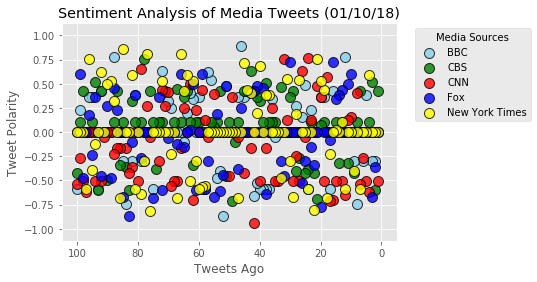

In [37]:
# Build the scatter plots for each Media source 
plt.scatter(BBC["Tweets_Ago"], 
            BBC["Compound"], 
            s=100, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="BBC")

plt.scatter(CBS["Tweets_Ago"], 
            CBS["Compound"], 
            s=100, c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CBS")

plt.scatter(CNN["Tweets_Ago"], 
            CNN["Compound"], 
            s=100, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="CNN")

plt.scatter(Fox["Tweets_Ago"], 
            Fox["Compound"], 
            s=100, c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Fox")

plt.scatter(nytimes["Tweets_Ago"], 
            nytimes["Compound"], 
            s=100, c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="New York Times")

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (01/10/18)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
#plt.xlim((205, -5)) # x-axis is for 200 tweets
plt.xlim((105, -5)) # x-axis is for 100 tweets
plt.ylim((-1.125, 1.125))
plt.grid(True)

# Create a legend
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", title="Media Sources")

# Save Figure
plt.savefig("sentiment_analysis_of_media_tweets.png")

# Show plot
plt.show()
 

In [38]:
# Obtain the x and y coordinates for each average compound sentiments for 5 media Sources
BBC_media = avg_sentiments_pd[avg_sentiments_pd["User"] == "@BBC"] 
CBS_media = avg_sentiments_pd[avg_sentiments_pd["User"] == "@CBSNews"]
CNN_media = avg_sentiments_pd[avg_sentiments_pd["User"] == "@CNN"]
Fox_media = avg_sentiments_pd[avg_sentiments_pd["User"] == "@FoxNews"]
nytimes_media = avg_sentiments_pd[avg_sentiments_pd["User"] == "@nytimes"]
#print(BBC_media)
#len(avg_sentiments_pd)
avg_sentiments_pd.iloc[0].Compound
ind = np.arange(len(avg_sentiments_pd))
print(ind[0])
avg_sentiments_pd.iloc[0].User
print(BBC_media)

0
   Compound  Negative  Neutral  Positive  Tweet_Count  User    color
0 -0.013201   0.88025  0.06361   0.05615          100  @BBC  skyblue


In [39]:
# Slice the data between the 5 social overall media sentiments of Compound
fig, ax = plt.subplots()
ind = np.arange(len(avg_sentiments_pd))  
width = 1
rectsBBC = ax.bar(ind[0], avg_sentiments_pd.iloc[0].Compound, width, color='skyblue')
rectsCNN = ax.bar(ind[1], avg_sentiments_pd.iloc[1].Compound, width, color='red')
rectsCBS = ax.bar(ind[2], avg_sentiments_pd.iloc[2].Compound, width, color='green')
rectsFox = ax.bar(ind[3], avg_sentiments_pd.iloc[3].Compound, width, color='blue')
rectsnytimes = ax.bar(ind[4], avg_sentiments_pd.iloc[4].Compound, width, color='yellow')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('Tweet Polarity')
ax.set_title('Overall Media Sentiment based on Twitter (01/10/18)')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('BBC', 'CBS', 'CNN', 'Fox', 'NYT'))
ax.set_autoscaley_on(False)
ax.set_ylim([-0.125,0.25])
ax.grid(True)

# Use functions to label the negative and positive of sentiment changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        height = round(height, 2) 
        print(height)
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%s' % (str(float(height))),
                ha='center', va='bottom', color="black", fontsize="9")

# Call functions to implement the function calls
autolabel(rectsBBC)
autolabel(rectsCBS)
autolabel(rectsCNN)
autolabel(rectsFox)     
autolabel(rectsnytimes)

# Save the Figure
fig.savefig("Overall_media_sentiment_based_on_twitter.png")

# Show the Figure
fig.show() 

-0.01
0.05
-0.1
-0.02
0.01


/Users/sunitharamakrishnan/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [40]:
#Overall_media_sentiment_based_on_twitter.png